# Pre-Req:


In [ ]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

#REMEMBER TO UPLOAD TEST AND TRAIN DATA

# Data Preprocessing:

In [ ]:
TrainDataset = pd.read_csv('/content/train.csv')
TrainDataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
TrainDataset.shape

(891, 12)

In [ ]:
#Mssing value check:
TrainDataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Drop cabin column - simply too many missing values to accuratley try and replace this
TrainDataset = TrainDataset.drop('Cabin', axis=1)
#Fill missing Age with mean and fill missing embarked with mode
mean_value = round(TrainDataset['Age'].mean())
mode_value = TrainDataset['Embarked'].mode()[0]

value = {'Age': mean_value, 'Embarked': mode_value}
TrainDataset.fillna(value=value,inplace=True)

In [ ]:
#Check for missing value after change
TrainDataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Data analysis:

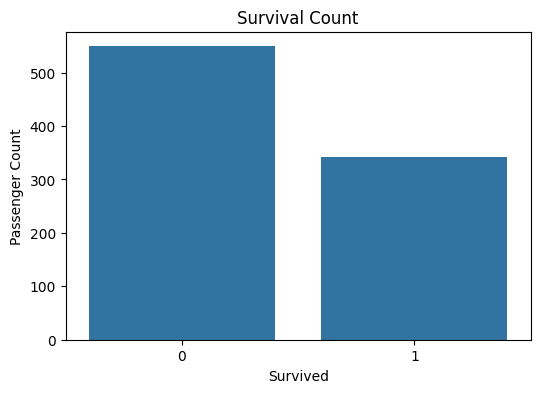

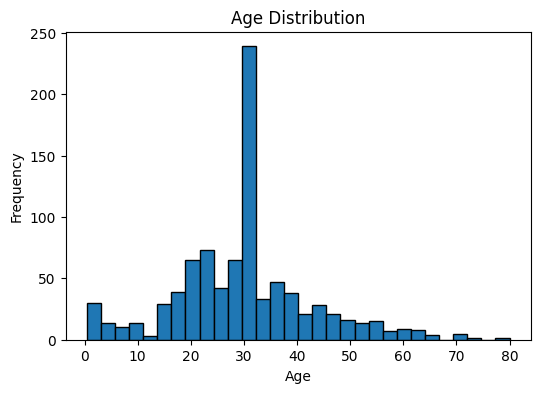

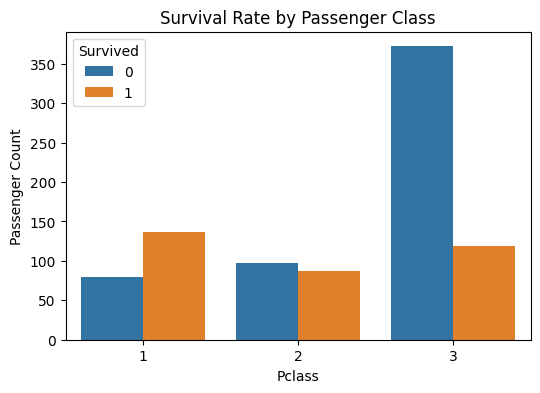

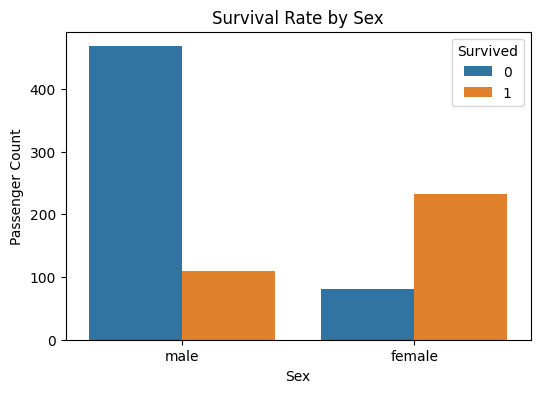

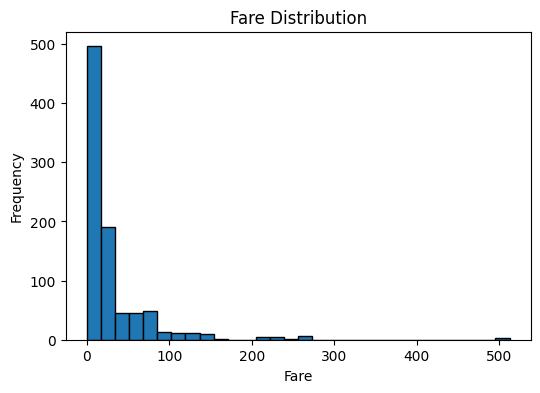

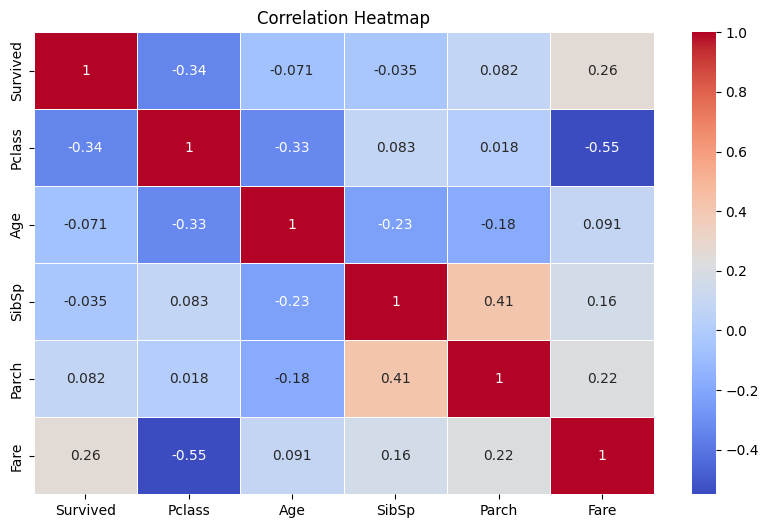

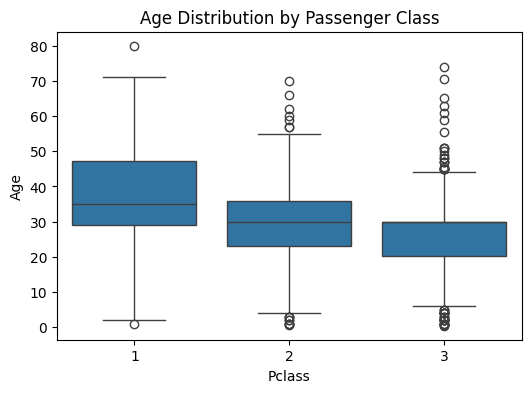

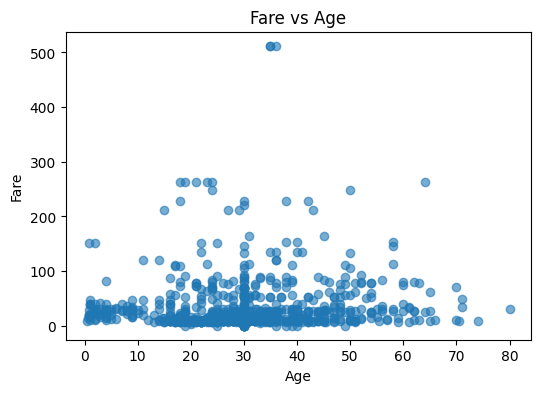

In [ ]:
# 1. Survival count plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=TrainDataset)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Passenger Count')
plt.show()

# 2. Age distribution
plt.figure(figsize=(6, 4))
TrainDataset['Age'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 3. Survival rate by Pclass
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=TrainDataset)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Passenger Count')
plt.legend(title='Survived')
plt.show()

# 4. Survival rate by Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=TrainDataset)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Passenger Count')
plt.legend(title='Survived')
plt.show()

# 5. Fare distribution
plt.figure(figsize=(6, 4))
TrainDataset['Fare'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# 6. Correlation heatmap (for numerical variables)
plt.figure(figsize=(10, 6))
sns.heatmap(TrainDataset[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 7. Boxplot for Age by Pclass
plt.figure(figsize=(6, 4))
sns.boxplot(x='Pclass', y='Age', data=TrainDataset)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

# 8. Scatter plot of Fare vs Age
plt.figure(figsize=(6, 4))
plt.scatter(TrainDataset['Age'], TrainDataset['Fare'], alpha=0.6)
plt.title('Fare vs Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [ ]:
# Load training data (train.csv)
TrainDataset = pd.read_csv('train.csv')

# Load the Kaggle test set (test.csv)
TestDataset = pd.read_csv('test.csv')

# Preprocessing of the training data
TrainDataset['Age'].fillna(TrainDataset['Age'].median(), inplace=True)
TrainDataset['Embarked'].fillna(TrainDataset['Embarked'].mode()[0], inplace=True)

# --- Drop the 'Cabin' column from training data (since it has many missing values) ---
TrainDataset.drop(['Cabin'], axis=1, inplace=True)

# Drop irrelevant columns (PassengerId, Name, Ticket)
TrainDataset.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Convert 'Sex' and 'Embarked' to numeric
le = LabelEncoder()
TrainDataset['Sex'] = le.fit_transform(TrainDataset['Sex'])
TrainDataset = pd.get_dummies(TrainDataset, columns=['Embarked'], drop_first=True)

# Features (X) and target (y)
X = TrainDataset.drop('Survived', axis=1)
y = TrainDataset['Survived']

# Train the Random Forest model on the entire training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# --- Preprocess the Kaggle test set for prediction ---
TestDataset['Age'].fillna(TestDataset['Age'].median(), inplace=True)
TestDataset['Fare'].fillna(TestDataset['Fare'].median(), inplace=True)  # fill missing Fare values if any

# --- Drop the 'Cabin' column from test data ---
TestDataset.drop(['Cabin'], axis=1, inplace=True)

# Drop irrelevant columns (PassengerId, Name, Ticket)
passenger_ids = TestDataset['PassengerId']  # Save PassengerId for the final CSV
TestDataset.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Convert 'Sex' and 'Embarked' to numeric
TestDataset['Sex'] = le.transform(TestDataset['Sex'])
TestDataset = pd.get_dummies(TestDataset, columns=['Embarked'], drop_first=True)

# Ensure the columns in TestDataset match the columns in X (train set)
# Fill any missing columns in test set with 0s (dummy variable handling)
for col in X.columns:
    if col not in TestDataset.columns:
        TestDataset[col] = 0

# Predict on the Kaggle test set
test_predictions = clf.predict(TestDataset)

# Create a DataFrame for the submission
submission_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': test_predictions
})

# Export predictions to a CSV file for submission to Kaggle
submission_df.to_csv('titanic_submission.csv', index=False)
print("Predictions exported to titanic_submission.csv")

Predictions exported to titanic_submission.csv
